<a href="https://colab.research.google.com/github/thuBv-123/Bui-Vu-Anh-Thu--31241025695--LT0001/blob/main/Bai%20tap%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
pip install scikit-fuzzy

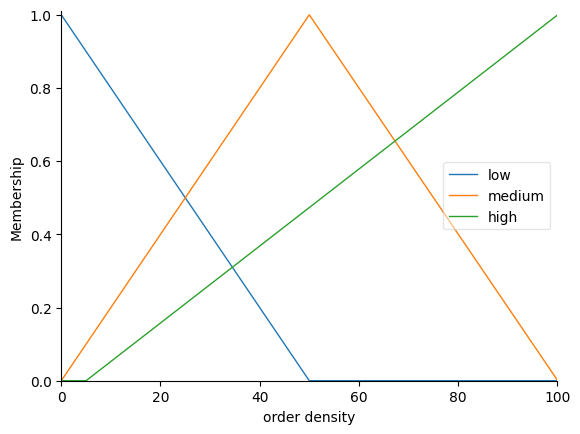

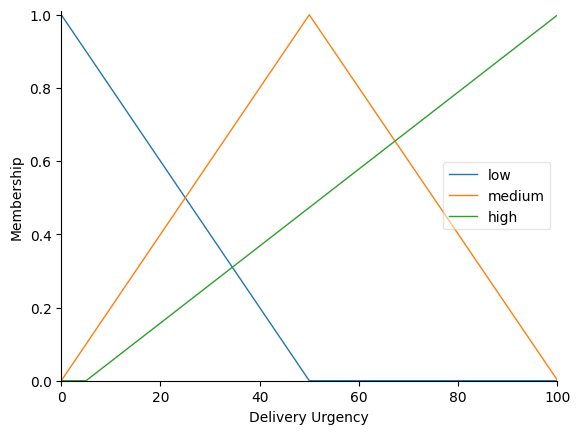

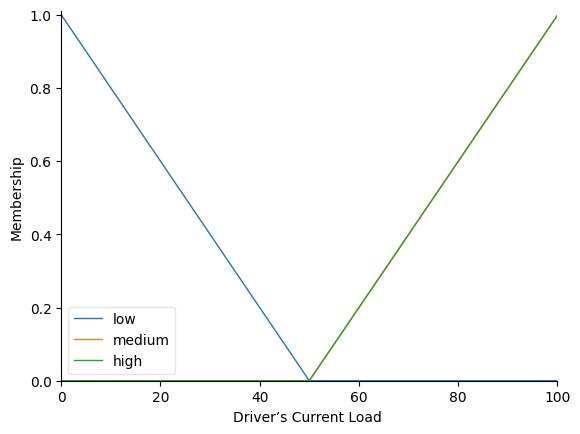

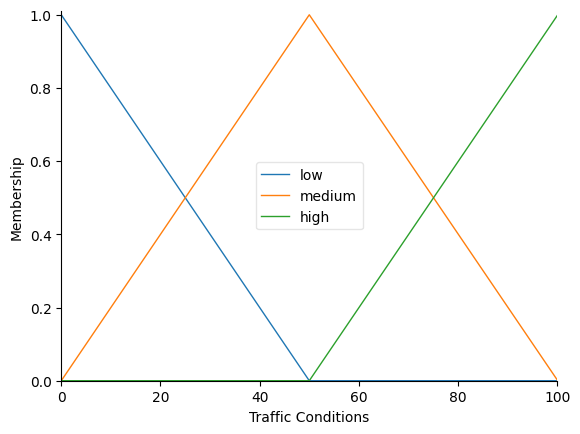

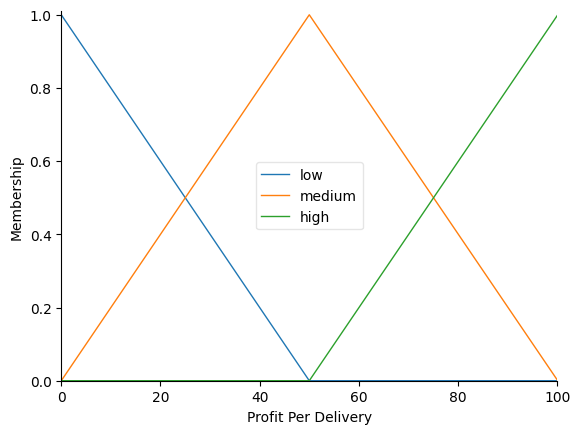

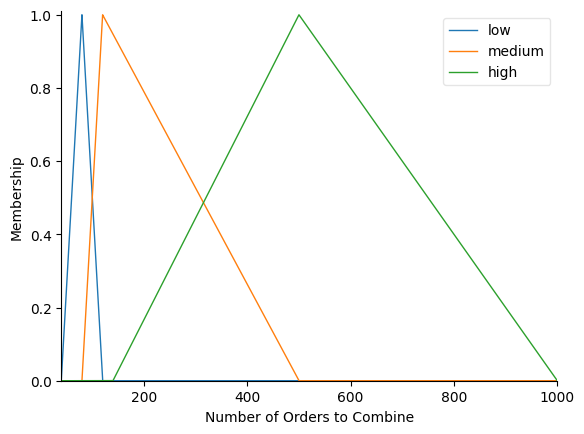

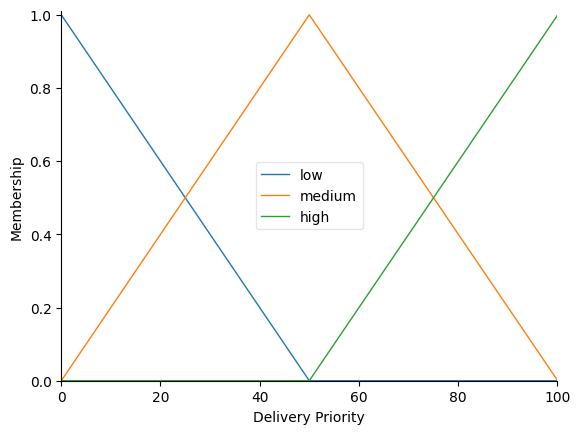

In [69]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


order_density=ctrl.Antecedent(np.arange(0,100.1,0.1),'order density')
delivery_urgency=ctrl.Antecedent(np.arange(0,100.1,0.1),'Delivery Urgency')
driver=ctrl.Antecedent(np.arange(0,100.1,0.1),'Driver’s Current Load ')
traffic=ctrl.Antecedent(np.arange(0,100.1,0.1),'Traffic Conditions')
profit=ctrl.Antecedent(np.arange(0,100.1,0.1),'Profit Per Delivery')
numbers=ctrl.Consequent(np.arange(40,1000.1,0.1),'Number of Orders to Combine')
priority=ctrl.Consequent(np.arange(0,100.1,0.1),'Delivery Priority')


order_density['low']=fuzz.trimf(order_density.universe,[0,0,50])
order_density['medium']=fuzz.trimf(order_density.universe,[0,50,100.1])
order_density['high']=fuzz.trimf(order_density.universe,[5,100.1,100.1])
delivery_urgency['low']=fuzz.trimf(delivery_urgency.universe,[0,0,50])
delivery_urgency['medium']=fuzz.trimf(delivery_urgency.universe,[0,50,100.1])
delivery_urgency['high']=fuzz.trimf(delivery_urgency.universe,[5,100.1,100.1])
driver['low']=fuzz.trimf(driver.universe,[0,0,50])
driver['medium']=fuzz.trimf(driver.universe,[50,100.1,100.1])
driver['high']=fuzz.trimf(driver.universe,[50,100.1,100.1])
traffic['low']=fuzz.trimf(traffic.universe,[0,0,50])
traffic['medium']=fuzz.trimf(traffic.universe,[0,50,100.1])
traffic['high']=fuzz.trimf(traffic.universe,[50,100.1,100.1])
profit['low']=fuzz.trimf(profit.universe,[0,0,50])
profit['medium']=fuzz.trimf(profit.universe,[0,50,100.1])
profit['high']=fuzz.trimf(profit.universe,[50,100.1,100.1])
numbers['low']=fuzz.trimf(numbers.universe,[40,80,120])
numbers['medium']=fuzz.trimf(numbers.universe,[80,120,500])
numbers['high']=fuzz.trimf(numbers.universe,[140,500,1000.1])
priority['low']=fuzz.trimf(priority.universe,[0,0,50])
priority['medium']=fuzz.trimf(priority.universe,[0,50,100.1])
priority['high']=fuzz.trimf(priority.universe,[50,100.1,100.1])


order_density.view()
delivery_urgency.view()
driver.view()
traffic.view()
profit.view()
numbers.view()
priority.view()

464.07115054052286
46.63489590797939


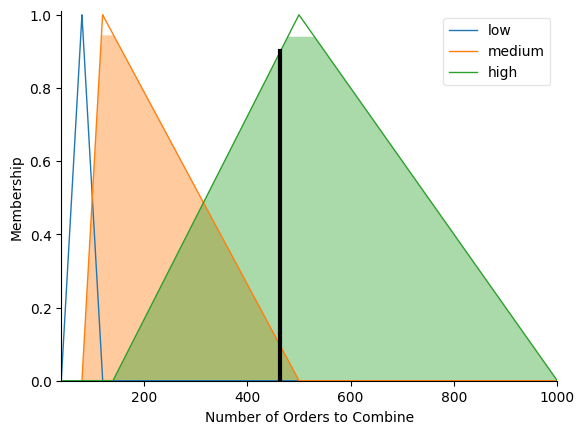

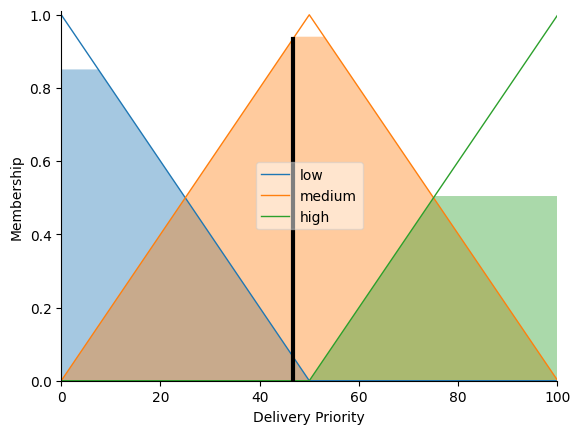

In [71]:
rule1=ctrl.Rule(order_density['high']|driver['low']|traffic['low'],numbers['high'])
rule2=ctrl.Rule(order_density['medium']|traffic['high']|delivery_urgency['medium'],numbers['medium'])
rule3=ctrl.Rule(driver['high']|order_density['high']|profit['medium'],numbers['medium'])
rule4=ctrl.Rule(order_density['low']|delivery_urgency['high']|traffic['medium'],numbers['medium'])
rule5=ctrl.Rule(profit['high']|delivery_urgency['high']|traffic['high'],numbers['medium'])
rule6=ctrl.Rule(delivery_urgency['high']|profit['high'],priority['high'])
rule7=ctrl.Rule(delivery_urgency['medium']|traffic['medium'],priority['medium'])
rule8=ctrl.Rule(delivery_urgency['low']|order_density['high']|profit['low'],priority['low'])


control_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
control_simulate=ctrl.ControlSystemSimulation(control_ctrl)



control_simulate.input['order density']=85.9
control_simulate.input['Delivery Urgency']=53
control_simulate.input['Driver’s Current Load ']=3
control_simulate.input['Traffic Conditions']=66.2
control_simulate.input['Profit Per Delivery']=47.2


control_simulate.compute()
print(control_simulate.output['Number of Orders to Combine'])
print(control_simulate.output['Delivery Priority'])
numbers.view(sim=control_simulate)
priority.view(sim=control_simulate)